In [151]:
import pandas as pd
import numpy as np
df_monthly = pd.read_csv('housing_in_london_monthly_variables.csv')
df_yearly = pd.read_csv('housing_in_london_yearly_variables.csv')

In [152]:
print("Name of columns and type of data in column:\n\n",df_monthly.dtypes)
print("\n")
print("Shape of data frame:" , df_monthly.shape)

Name of columns and type of data in column:

 date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object


Shape of data frame: (13549, 7)


Sum of duplicated data in borough_flag column:  13547
Number of unique values in 'code' column in data frame:  45
Number of unique values in 'date' column in data frame:  301
Number of unique values in 'area' column in data frame:  45
Number of unique values in 'code' column in data frame:  45
Number of unique values in 'houses_sold' column in data frame:  3947
Number of unique values in 'no_of_crimes' column in data frame:  2670
Number of unique values in 'borough_flag' column in data frame:  2
Number of duplicated vaules in 'average price' column in data frame:  13549
Number of duplicated values in houses_sold column in data frame:  13549
Number of values in each column in data frame:
 date             13549
area             13549
average_price    13549
code             13549
houses_sold      13549
no_of_crimes     13549
borough_flag     13549
dtype: int64
Number of null values in data frame:
 date             0
area             0
average_price    0
code             0
houses_sold    

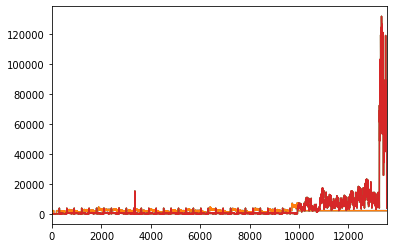

In [174]:
print("Sum of duplicated data in borough_flag column: ",df_monthly.duplicated(subset = ['borough_flag']).sum())
print("Number of unique values in 'code' column in data frame: " , len(df_monthly.code.unique()))
#df_monthly=df_monthly.drop_duplicates(keep = False)
print("Number of unique values in 'date' column in data frame: " , len(df_monthly.date.unique()))
print("Number of unique values in 'area' column in data frame: " , len(df_monthly.area.unique()))
print("Number of unique values in 'code' column in data frame: " , len(df_monthly.code.unique()))
print("Number of unique values in 'houses_sold' column in data frame: " , len(df_monthly.houses_sold.unique()))
print("Number of unique values in 'no_of_crimes' column in data frame: " , len(df_monthly.no_of_crimes.unique()))
print("Number of unique values in 'borough_flag' column in data frame: " , len(df_monthly.borough_flag.unique()))
print("Number of duplicated vaules in 'average price' column in data frame: " , len(df_monthly.average_price.duplicated()))
print("Number of duplicated values in houses_sold column in data frame: " , len(df_monthly.houses_sold.duplicated()))
print("Number of values in each column in data frame:\n" , df_monthly.count())
#print("Dropping duplicated rows from data frame: " , df_monthly = df_monthly.drop_duplicates())
print("Number of null values in data frame:\n" , df_monthly.isnull().sum())
print("Mean value for the no_of_crimes to replace Nan values:\n" , df_monthly.no_of_crimes.mean())
print("Mean value for the houses_sold to replace Nan values:\n" , df_monthly.houses_sold.mean())
print("Plot of no_of_crimes before the null values are filled:\n")
df_monthly.no_of_crimes.plot()
no_of_crimes_mean = df_monthly.no_of_crimes.mean()
df_monthly.no_of_crimes = df_monthly.no_of_crimes.fillna(mean)
print("Plot of no_of_crimes after the null values are filled:\n")
df_monthly.no_of_crimes.plot()
print("Plot of houses_sold before the null values are filled:\n")
df_monthly.houses_sold.plot()
houses_sold_mean = df_monthly.houses_sold.mean()
df_monthly.houses_sold = df_monthly.houses_sold.fillna(houses_sold_mean)
print("Plot of houses_sold after the null values are filled:\n")
df_monthly.houses_sold.plot()

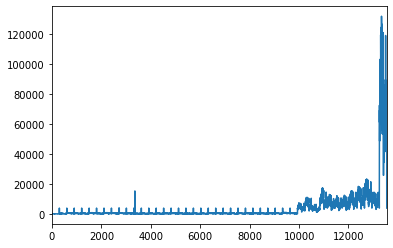

In [171]:
df_monthly.houses_sold.plot()

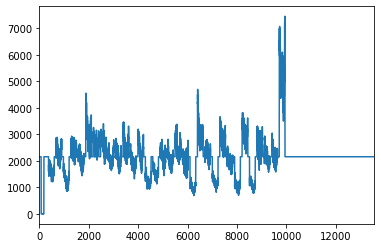

In [160]:
df_monthly.no_of_crimes.plot()

In [157]:
df_monthly.no_of_crimes.mean()

2158.3520634493884

In [19]:
df_monthly = df_monthly.dropna()
df_monthly.count()
print(df_monthly.isnull().sum())
import seaborn as sns 
sns.boxplot(x=df_monthly.average_price)
sns.boxplot(x=df_monthly.houses_sold)
sns.boxplot(x=df_monthly.no_of_crimes)
sns.boxplot(x=df_monthly.borough_flag)
# statistics 
q1 = df_monthly.quantile(0.25)
q3 = df_monthly.quantile(0.75)
iqr = q3-q1
print(iqr)
df_monthly = df_monthly[~((df_monthly < (q1-1.5 * iqr)) | (df_monthly > (q3 + 1.5 * iqr))).any(axis=1)]
df_monthly.shape
df_monthly.average_price.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Average Price")
plt.xlabel("Price")
plt.ylabel("Not sure")
df_monthly.houses_sold.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Houses Sold")
plt.xlabel("Houses Sold")
plt.ylabel("Not sure")
df_monthly.no_of_crimes.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of Crimes")
plt.xlabel("No. of crimes")
plt.ylabel("Not sure")
plt.figure(figsize = (20,10))
c = df_monthly.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_monthly.date,df_monthly.average_price)
ax.set_xlabel('date')
ax.set_ylabel('average_price')
plt.show()

In [23]:
# count 0's and 1's in column
counts = flags.value_counts()
counts[0], counts[1]

(3613, 9936)

In [123]:
import seaborn as sns
from seaborn import FacetGrid
#df_monthly['borough_flag'].plot()
flags = df_monthly.borough_flag
date = df_monthly.date
average_price = df_monthly.average_price
no_of_crimes = df_monthly.no_of_crimes
houses_sold = df_monthly.houses_sold
len(df_monthly.columns)
g = FacetGrid(df_monthly,col='average_price',height = 3.5,aspect = .65)
g.map(sns.lineplot,"date")
sns.lineplot(x=date,y=no_of_crimes)
sns.lineplot(x=date,y=houses_sold)
df_monthly['date'].duplicated()
df_monthly['area'].duplicated()
df_monthly['code'].duplicated()
df_monthly.info()
df_monthly['borough_flag'].plot()
df_monthly['houses_sold'].plot()
df_monthly['average_price'].plot()
df_monthly['no_of_crimes'].plot()
df_monthly['borough_flag'].mean()
df_monthly['borough_flag'].std()
# count 0's and 1's in column
counts = flags.value_counts()
counts[0], counts[1]

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x122ad7950> (for post_execute):


ValueError: Image size of 2185583x252 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 2185583x252 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2.18558e+06x252 with 1157 Axes>

In [136]:
df_monthly.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
borough_flag     13549
dtype: int64